# APS 2 – ANÁLISE DA DIFUSÃO DE UM POLUENTE EM UM RIO COM CORRENTEZA

### Grupo 10 - Matheus Castellucci, Pedro Gomes, João Pedro dos Santos

In [176]:
from math import *
import matplotlib.pyplot as plt
import numpy as np

Esses são os parâmetros que modelam o sistema:

<img src = "imgs/Funcao1.png">

Como trata-se de um sistema de difusão de poluentes no rio, devemos usar a mesma equação para a difusão de calor. 
<img src = "imgs/Funcao2.png">

Esses são os objetivos que devem ser respondidos com a APS: 
<img src = "imgs/Tarefas.png">

## Tarefa 1 (2,0 pontos):
### Substitua as derivadas da equação de Burgers pelas aproximações de diferenças finitas. Use diferença central para as derivadas em X e Y e diferença avançada para a derivada no tempo
![Alt text](imgs/tarefa1_feita.jpeg)

## Tarefa 2:
### (2,0 pontos): Manipule algebricamente a equação obtida no item “a” e encontre a expressão da concentração em um ponto genérico (x, y) no instante futuro t + 1 em função das concentrações no instante atual t
![Alt text](imgs//tarefas2e3_feitas.jpeg)

## Tarefa 3:

In [177]:
#Dados do problema
K = 1 #m²/s
alpha = 1 #m/s
T_despejo = 3 #s
Q_ponto = 100 #kg/ms
Lx = 30 #m
Ly = 20 #m
Tempo_total = 30 #s

#Ponto de solta do poluente
n = 10 #número do grupo
a = n/1.4
b = (60/(n+5))

In [178]:
#Contornos do problema

#Contorno A
#   delta_t/delta_s² < 1/4*K
#   delta_t/delta_s² < 0.25
#delta_x = delta_y = delta_s
delta_s = 1 #m
divisor = 1.5 #numero necessario para fazer que a condição de contorno seja satisfeita (sempre deixar maior que 1)
delta_t = (0.25*delta_s**2)/divisor
# delta_t = (delta_s**2)/4*K
# delta_t = (0.25 * delta_s ** 2) / (4 * K)

In [179]:
x = int(Lx/delta_s)
y = int(Ly/delta_s)

#Informações do ponto de solta
a_idx = int(a/delta_s)
b_idx = int(b/delta_s)

qC_ponto = Q_ponto/(delta_s**2)

In [180]:
#lembrando que o i é a coluna e o j é a linha -> No enunciado está invertido
def simulacao(K, t_final):
    C = np.zeros((x, y))
    tt = int(t_final/delta_t)

    var = False
    for t in range(tt):
        C2 = np.copy(C)



        for i in range(1, y-1):    
            for j in range(1, x-1):
                v = alpha * np.sin(np.pi * j * delta_s /5)
                # if t <= (T_despejo/delta_t) and (j == int(a_idx) and i == (b_idx)):
                #   C[a_idx][b_idx] += qC_ponto * delta_t
                termo1 = -v * (C[j+1][i] - C[j-1][i])/(2*delta_s)
                termo2 = -alpha * (C[j][i+1] - C[j][i-1])/(2*delta_s)
                
                termo3 = K * (C[j+1][i] - 2*C[j][i] + C[j-1][i])/(delta_s**2)
                termo4 = K * (C[j][i+1] - 2*C[j][i] + C[j][i-1])/(delta_s**2)

                if (j == int(a) and i == b) and t < T_despejo/delta_t:
                     termo5 = 1000

                else:
                    termo5= 0


                C2[j][i] = C[j][i] + delta_t * (termo5 + termo1 + termo2 + termo3 + termo4)

                if C2[j][i] < 0:
                    C2[j][i] = 0

        C2[0][:] = C2[1][:]
        C2[-1][:] = C2[-2][:]
        C2[:][0] = C2[:][1]
        C2[:][-1] = C2[:][-2]
        
        C = np.copy(C2)
    print(np.max(C))
    #Graficos
    plt.imshow(C, cmap='viridis', extent=[0, Lx, 0, Ly])
    plt.colorbar(label='Concentration')
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.title(f'Concentração de Poluentes após {t_final}s')
    plt.show()


0.3207864370958668


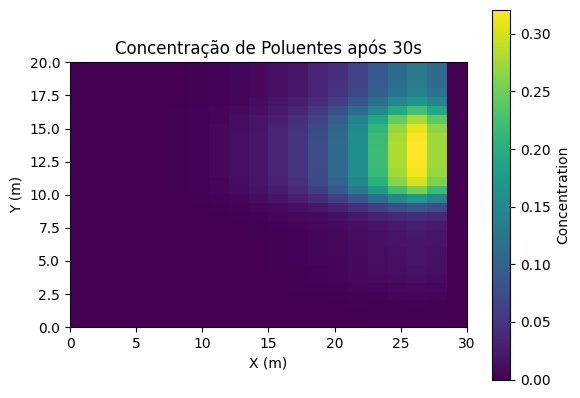

In [181]:
simulacao(K, Tempo_total)

## Tarefa 4:

0.35542554471807813


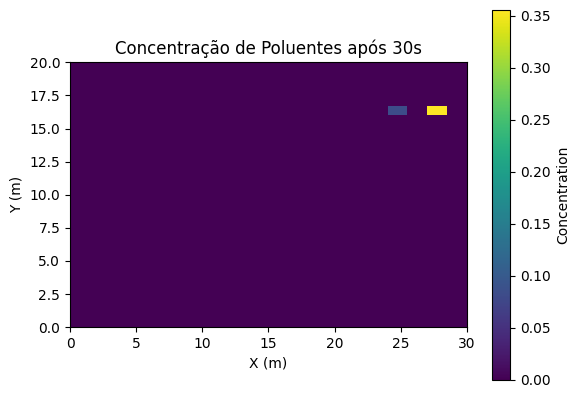

0.002664279734196805


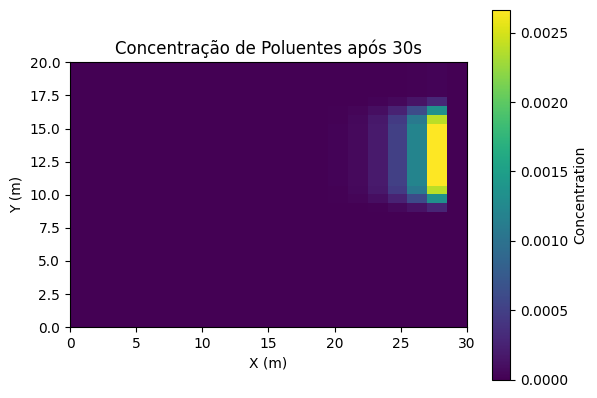

5.375687207564364e+21


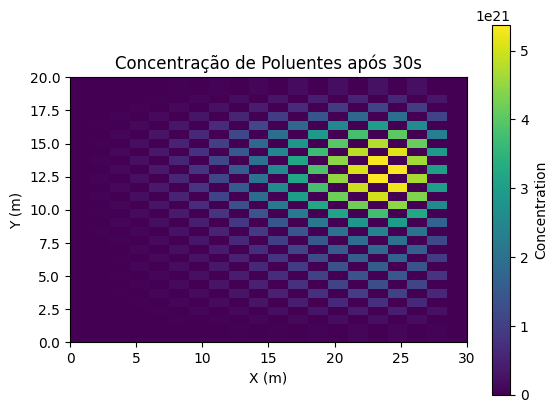

In [182]:
lista_k = [0.1, 0.5, 2]

C = np.zeros((x, y))

for K in lista_k:
    simulacao(K, Tempo_total)

## Tarefa 5:

498.1562684192496


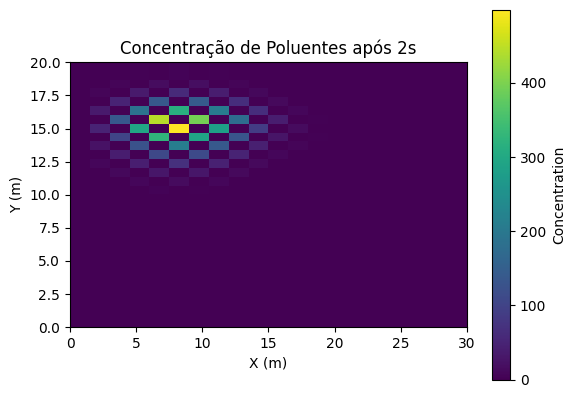

22469.304846209685


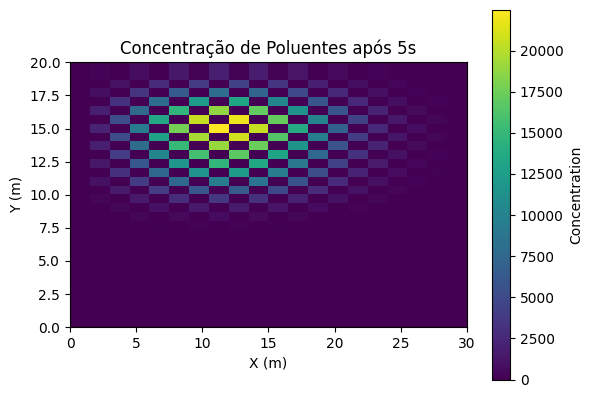

470402.0554657961


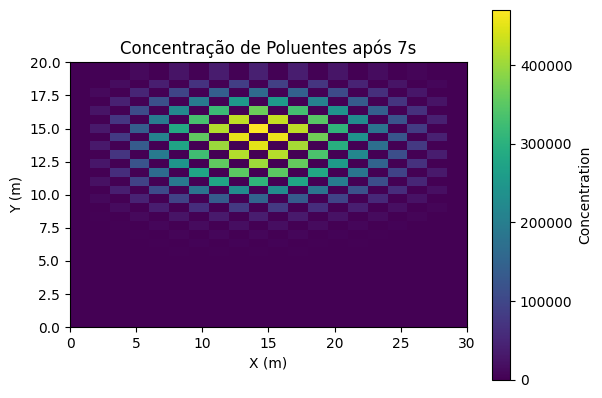

58546351.68232051


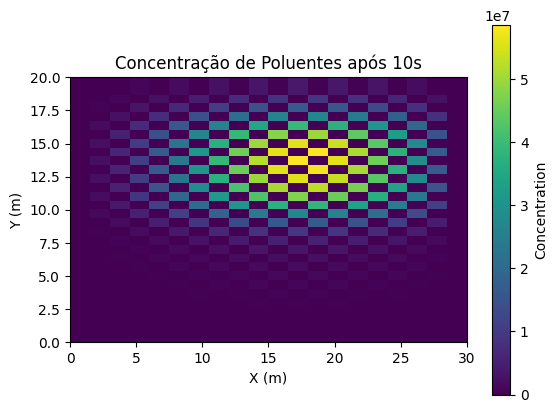

694140490002880.8


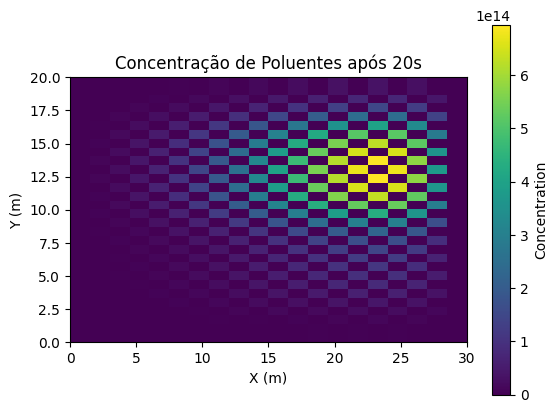

5.375687207564364e+21


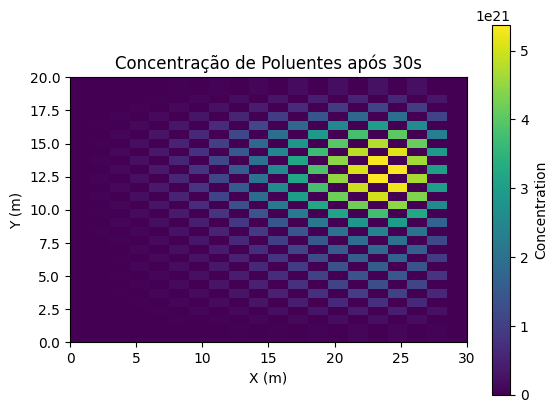

In [183]:
lisa_t_testes = [2, 5, 7, 10, 20, 30]

for t in lisa_t_testes:
    simulacao(K, t)


## Teste de Validação

2.558972245426798


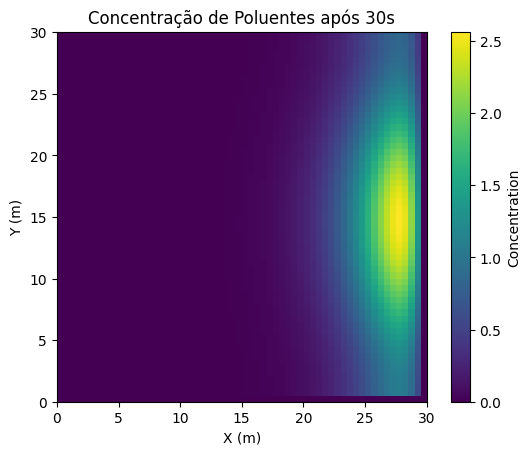

In [184]:
K = 1
delta_t = 0.05
delta_s = 0.5
alpha = 1
Lx = 30
Ly = 30
T_despejo = 2
T_final = 5
a = b = 15
Q_ponto = 80

x = int(Lx/delta_s)
y = int(Ly/delta_s)

C = np.zeros((x, y))

a_idx = int(a/delta_s)
b_idx = int(b/delta_s)

qC_ponto = Q_ponto/(delta_s**2)

C = np.zeros((x, y))
tt = int(30/delta_t)


print(np.max(C))
#Graficos
plt.imshow(C, cmap='viridis', extent=[0, Lx, 0, Ly])
plt.colorbar(label='Concentration')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title(f'Concentração de Poluentes após 30s')
plt.show()



In [185]:
print(0.622/C[40][40])

2.8116329088938348
